# Part 1 of Highlights: Wedge Highlights

This page is primarily based on the following page at the Circos documentation site:



- [1. Wedge Highlights](????????????)



That page is the first part of the ??? part ['Highlights' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to the end of the previous section by clicking [here &#8592;](Drawing_ideograms_Part10.ipynb).



----



3 --- Highlights
================

1. Wedge Highlights
-------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/highlights/wedges/lesson){.clean}]{.active}
[Images](/documentation/tutorials/highlights/wedges/images){.normal}
[Configuration](/documentation/tutorials/highlights/wedges/configuration){.normal}
:::

Highlights are special track type used for highlighting regions of the
image created by Circos. Highlights are defined in a
[\<highlights\>]{.syn-block} block are different than tracks defined in
a [\<plots\>]{.syn-block} block in the following ways

-   highlights are drawn underneath any grids and other data
-   highlights can be automatically locked to lie within the radial

```ini
extent of the ideograms
```


In effect, highlights give you the ability to draw a colored slice,
defined by start/end radius and start/end genomic position, anywhere
within the image. Used creatively, highlights can be used to draw
attention to a region of the genome, specify area masks, and even draw
ideograms from another species as concentric circles.

If you want to draw highlights on top of data, use a `type=highlight`
[\<plot\>]{.syn-block} block, which is described in detail
[here](/documentation/tutorials/highlights/on_data).

### wedge vs ideogram highlights

Wedge highlights have flexible radial start and end positions. These
radial positions are defined by the `r0` and `r1` parameters (see
below).

Ideogram highlights are drawn inside the ideograms, on top of the
cytogenetic bands, if those are drawn.

### defining highlights

Highlights are defined in external data files. A highlight file is
composed of at least three fields, with potentially a fourth field that
defines formatting for each highlight. For example, a simple highlight
file might contain lines such as

```ini
...
hs1 1298972 1300443
hs1 1311738 1324571
hs1 1397026 1421444
hs1 1437417 1459927
...
```


Formatting and data files for highlights are defined in
[\<highlights\>]{.syn-block} blocks. In the example below, the same
highlight data file, `genes.txt`{.syn-include}, which uses gene
transcription regions to define highlights, is drawn three times in the
figure.

```ini
<highlights>
```


```ini
z          = 0
fill_color = green
```


```ini
<highlight>
file       = data/3/genes.txt
r0         = 0.6r
r1         = 0.8r
</highlight>
```


```ini
<highlight>
file       = data/3/genes.txt
r0         = 0.7r
r1         = 0.75r
z          = 5
</highlight>
```


```ini
<highlight>
file       = data/3/genes.txt
r0         = 1.1r
r1         = 1.15r
fill_color = blue
stroke_color = dblue
stroke_thickness = 2
</highlight>
```


```ini
</highlights>
```


First, all highlights are confined within a [\<highlights\>]{.syn-block}
block. A given highlight can have its parameters specified in three
places. In increasing order of precedence these are

-   the `highlights` block
-   individual `highlight` block
-   data file

Thus, if a highlight is formatted to have a red fill color in the data
file, this value overrides any other color setting for that highlight in
[\<highlight\>]{.syn-block} or [\<highlights\>]{.syn-block} blocks.

### highlight radial position

The primary highlight feature that you want to control is the radial
start and end position, defined by `r0` (inner) and `r1` (outer) radii.
Both values are defined relative (`r`) to the ideogram radius or in
terms of absolute pixels (`p`) from the center of the image.

Defining relative radial position is helpful because if you adjust the
image size, the position of the highlights will not be altered, relative
to other features in the image. For example

```ini
r0 = 0.5r
r1 = 0.75r
```


will set the highlight radial position to be `0.5-0.75` of the fraction
of the inner ideogram radius. Highlights with `r0`,`r1` \> 1 will be
defined relative to the outer ideogram radius.

It is possible to mix relative and absolute values. For example,

```ini
r0 = 0.5r
r1 = 1r-25p
```


will draw the highlight from 50% of the inner ideogram radius all the
way to the inner ideogram radius, less 25 pixels. Specifying absolute
values provides pixel-level control over position of highlight features.
This becomes important when you wish to present your image at different
scales, when a constant 5px margin may be more meaningful than a 1%
margin.

### z-depth

Each highlight is specified by a single data file line and is defined by
a genomic start and end position on the same chromosome. Highlights are
drawn independently and you can control which highlights are drawn first
by specifying a highlight\'s z-depth value.

Nearly ll Circos data structures can be assigned a z-depth value to
control which elements are drawn in front.

In the block definition of this tutorial section, you\'ll see that the
`highlights` block has a default z-depth value assigned

```ini
z = 0
```


This is the default z-depth value, and as such does not have to be
explicitly stated. It\'s helpful to do so, however, especially when
planning to adjust the z-depth later.

The second highlight block defines a set of highlights drawn at `z=5`.
Since this block\'s z-depth is higher, it will be drawn on top of the
first highlight block. In effect, what will happen is that the
highlights defined by the first block will be drawn first, followed by
highlights of the second block.

The net effect is a set of red, shorter highlights (100px tall) drawn on
top of the green highlights defined by the first block.

### highlight formatting

The following parameters can be controlled for each highlight

-   `r0` - inner radius of highlight
-   `r1` - outer radius of highlight
-   `offset` - an offset applied to both r0 and r1 (useful for

```ini
overriding default r0,r1 values defined at lower precedence)
```


-   `fill_color` - color of the highlight slice
-   `stroke_color` - color of the highlight border, drawn if

```ini
stroke\_thickness is set
```


-   `stroke_thickness` - border thickness, if any, of the highlight

```ini
slice
```


-   `z` - z-depth of the highlight, controlling the order in which

```ini
highlights are drawn
```


-   `ideogram` - toggles the position of the highlight to be within the

```ini
ideogram extent
```


All of these are explored in other parts of this tutorial section.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/3/1/

/home/jovyan/circos-tutorials-0.67/tutorials/3/1


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.43s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.44s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/3/1
debuggroup summary 0.44s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.44s loading configuration from file circos.conf
debuggroup summary 0.45s found conf file circos.conf
debuggroup summary 0.61s debug will appear for these features: output,summary
debuggroup summary 0.61s bitmap output image ./circos.png
debuggroup summary 0.61s SVG output image ./circos.svg
debuggroup summary 0.61s parsing karyotype and organizing ideograms
debuggroup summary 0.72s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.72s applying global and local scaling
debuggroup summary 0.72s allocating image, colors and brushes
debuggroup summary 2.59s drawing 3 ideograms of total size 690,472,427
debuggroup summary 2.59s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

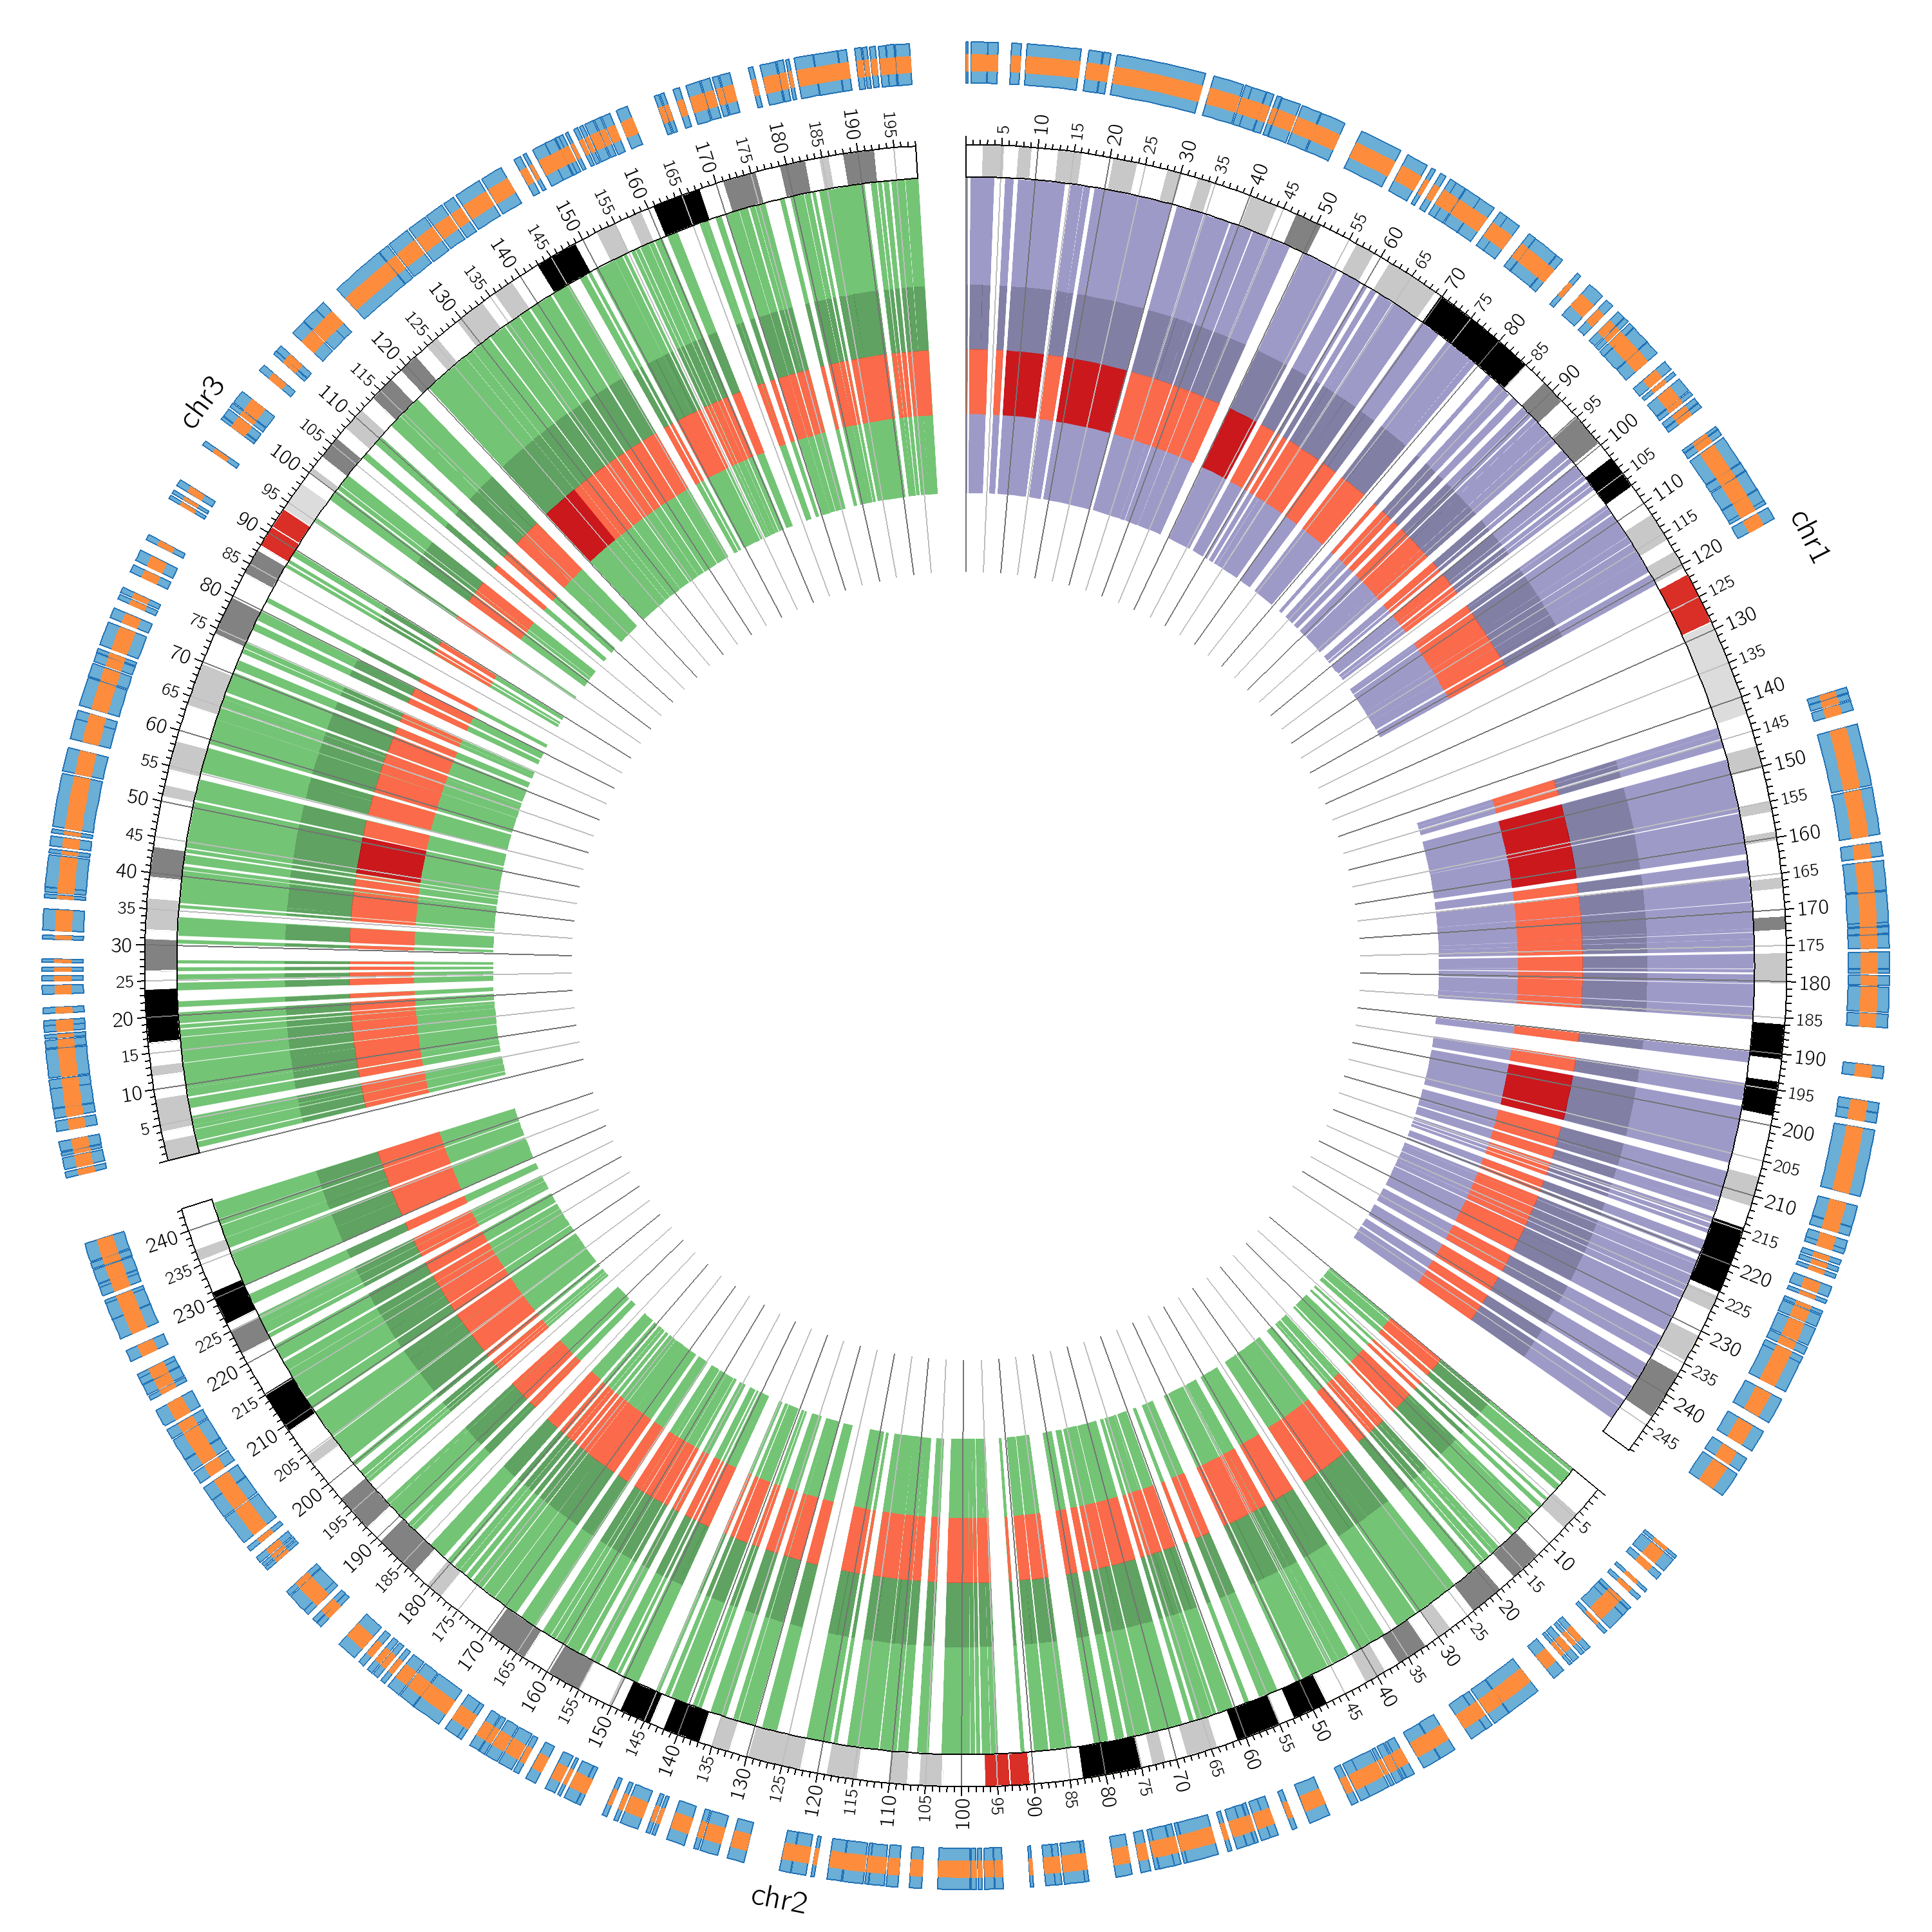

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Highlights series by clicking [here &#10145;](Highlights_Part2.ipynb).

----